In [54]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [55]:
import pandas as pd

data = pd.read_csv('water_potability.csv')
data.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


**DATA PREPROCESSING**

In [56]:
data.isnull().sum()


ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [57]:
data['ph']=data['ph'].fillna(data['ph'].mean())
data['Sulfate']=data['Sulfate'].fillna(data['Sulfate'].mean())
data['Trihalomethanes']=data['Trihalomethanes'].fillna(data['Trihalomethanes'].mean())


In [58]:
data.isnull().sum()


ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

In [59]:
data.head()


,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,7.080795,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,333.775777,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,333.775777,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [60]:
data.Potability.value_counts()


0    1998
1    1278
Name: Potability, dtype: int64

In [61]:
# sns.distplot(data["ph"])
# plt.show()


In [62]:
features_num = ['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate',
                'Conductivity', 'Organic_carbon', 'Trihalomethanes',
                'Turbidity']

<Axes: >

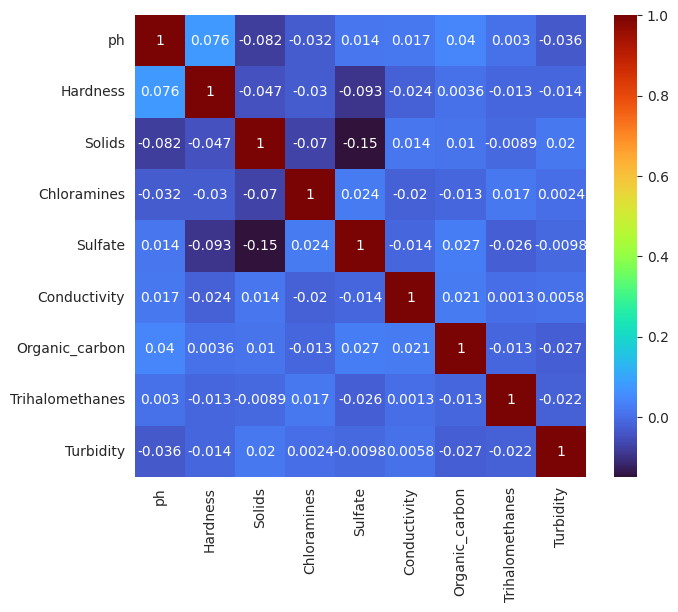

In [63]:
corr = data[features_num].corr()

plt.figure(figsize=(16,6))
ax1 = plt.subplot(1,2,1)
sns.heatmap(corr, annot=True, cmap='turbo')

In [64]:
sns.pairplot(data=data,hue="Potability")

Output hidden; open in https://colab.research.google.com to view.

In [65]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X =  pd.DataFrame(sc_X.fit_transform(data.drop(["Potability"],axis = 1)),
        columns=['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity'])

In [66]:
X.head()


,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
0,-6.043133e-16,0.259195,-0.139471,0.112415,9.613574e-01,1.708954,-1.180651,1.306149,-1.286298
1,-2.289339e+00,-2.036414,-0.385987,-0.307694,3.145987e-15,2.062575,0.270597,-0.638480,0.684218
2,6.928678e-01,0.847665,-0.240047,1.360594,3.145987e-15,-0.094032,0.781117,0.001509,-1.167365
3,8.409504e-01,0.547651,0.000493,0.592008,6.395190e-01,-0.778830,1.255134,2.152874,0.848412
4,1.368569e+00,-0.464429,-0.460249,-0.363698,-6.541765e-01,-0.343939,-0.824357,-2.181599,0.138786


In [67]:
y=data["Potability"]


In [68]:
y


0       0
1       0
2       0
3       0
4       0
       ..
3271    1
3272    1
3273    1
3274    1
3275    1
Name: Potability, Length: 3276, dtype: int64

In [69]:
from sklearn.model_selection import train_test_split                #splitting the dataset

X_train,X_test,Y_train,Y_test = train_test_split(X,y,test_size=.2,random_state=42)

**LOGISTIC REGRESSION**

In [70]:
# from sklearn.metrics import accuracy_score  #logistic
# from sklearn.linear_model import LogisticRegression
# # log_reg = LogisticRegression()
# log_reg = LogisticRegression(max_iter=5000)

# log_reg.fit(X_train,Y_train)

# log_acc=accuracy_score(Y_test,log_reg.predict(X_test))


# print("Train Set Accuracy:"+str(accuracy_score(Y_train,log_reg.predict(X_train))*100))
# print("Test Set Accuracy:"+str(accuracy_score(Y_test,log_reg.predict(X_test))*100))


In [71]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# Assuming X and Y are your feature matrix and target variable
# Split the data into training and testing sets
# X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Logistic Regression model
log_reg = LogisticRegression(max_iter=5000)

# Perform Recursive Feature Elimination (RFE)
num_features_to_select = 7  # Adjust based on your dataset
rfe = RFE(log_reg, n_features_to_select=num_features_to_select)
X_train_rfe = rfe.fit_transform(X_train, Y_train)
X_test_rfe = rfe.transform(X_test)

# Fit the model with the selected features
log_reg.fit(X_train_rfe, Y_train)

# Accuracy calculation on the selected features
log_acc_train = accuracy_score(Y_train, log_reg.predict(X_train_rfe))
log_acc_test = accuracy_score(Y_test, log_reg.predict(X_test_rfe))

print("Train Set Accuracy (with feature selection): {:.2f}%".format(log_acc_train * 100))
print("Test Set Accuracy (with feature selection): {:.2f}%".format(log_acc_test * 100))


Train Set Accuracy (with feature selection): 60.53%
Test Set Accuracy (with feature selection): 62.80%


**KNN**

In [72]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score
knn = KNeighborsClassifier(n_neighbors=9)                #knn classifier
knn.fit(X_train,Y_train)

knn_acc = accuracy_score(Y_test,knn.predict(X_test))


print("Train Set Accuracy:"+str(accuracy_score(Y_train,knn.predict(X_train))*100))
print("Test Set Accuracy:"+str(accuracy_score(Y_test,knn.predict(X_test))*100))


Train Set Accuracy:71.83206106870229
Test Set Accuracy:64.02439024390245


**SVM**

In [73]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score

svm = SVC()
svm.fit(X_train, Y_train)

# Accuracy calculation
svm_acc_test = accuracy_score(Y_test, svm.predict(X_test))
svm_acc_train = accuracy_score(Y_train, svm.predict(X_train))

print(f"Original Train Set Accuracy: {svm_acc_train * 100:.2f}%")
print(f"Original Test Set Accuracy: {svm_acc_test * 100:.2f}%")



Original Train Set Accuracy: 73.78%
Original Test Set Accuracy: 69.51%


**DECISION TREE**

In [74]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier(criterion='entropy',max_depth=10)
dtc.fit(X_train, Y_train)


dtc_acc= accuracy_score(Y_test,dtc.predict(X_test))

print("Train Set Accuracy:"+str(accuracy_score(Y_train,dtc.predict(X_train))*100))
print("Test Set Accuracy:"+str(accuracy_score(Y_test,dtc.predict(X_test))*100))


Train Set Accuracy:76.25954198473282
Test Set Accuracy:64.48170731707317


**SSS**

In [75]:
from sklearn.utils import resample

num=data.iloc[:,-1].value_counts()
d=resample(data[data.iloc[:,-1]==1] , replace=True,    # sample with replacement
                                 n_samples= num[0], # to match majority class
                                 random_state=42)  # reproducible results)
data=pd.concat([d,data[data.iloc[:,-1]==0]])

from sklearn.preprocessing import MinMaxScaler, PolynomialFeatures
import pandas as pd
from sklearn.model_selection import StratifiedShuffleSplit
sss = StratifiedShuffleSplit(n_splits=5, test_size=0.1, random_state=42)

# Create PolynomialFeatures and MinMaxScaler
Polynom = PolynomialFeatures(degree=3)
scaler = MinMaxScaler()

# Transform the features
data_poly = Polynom.fit_transform(data.iloc[:, :-1])
data_scaled = scaler.fit_transform(data_poly)

# Create a DataFrame with the transformed features and concatenate the target variable
data2 = pd.DataFrame(data_scaled, columns=[f'poly_{i}' for i in range(data_scaled.shape[1])])
data2['target'] = data.iloc[:, -1].values

num=data2.iloc[:,-1].value_counts()
data2=data2.sample(len(data2))

train=0
test=0
for idx_train,idx_test in sss.split(data2.iloc[:,:-1],data2.iloc[:,-1]):
    train=data2.iloc[idx_train,:]
    test=data2.iloc[idx_test,:]


**XGBoost**

In [76]:
from xgboost import XGBClassifier

model_xgb=XGBClassifier(random_state=42,n_estimators=300)

# Assuming you have a loop for cross-validation
accuracies = []

for idx_train, idx_test in sss.split(train.iloc[:,:-1], train.iloc[:,-1]):
    model_xgb.fit(train.iloc[idx_train,:-1], train.iloc[idx_train,-1])
    accuracy = model_xgb.score(train.iloc[idx_test,:-1], train.iloc[idx_test,-1])
    accuracies.append(accuracy)
    print(accuracy)

# Get the last accuracy value
xg_acc = accuracies[-1]
print("Last Accuracy:", xg_acc)


0.8166666666666667
0.8388888888888889
0.8305555555555556
0.8722222222222222
0.8333333333333334
Last Accuracy: 0.8333333333333334


In [77]:
models = pd.DataFrame({
    'Model': ['Logistic','KNN', 'SVC',  'Decision Tree Classifier','xg_acc'],
    'Score': [ log_acc_test,knn_acc, svm_acc_test , dtc_acc,xg_acc]
})

models.sort_values(by = 'Score', ascending = False)

,Model,Score
4,xg_acc,0.833333
2,SVC,0.695122
3,Decision Tree Classifier,0.644817
1,KNN,0.640244
0,Logistic,0.628049


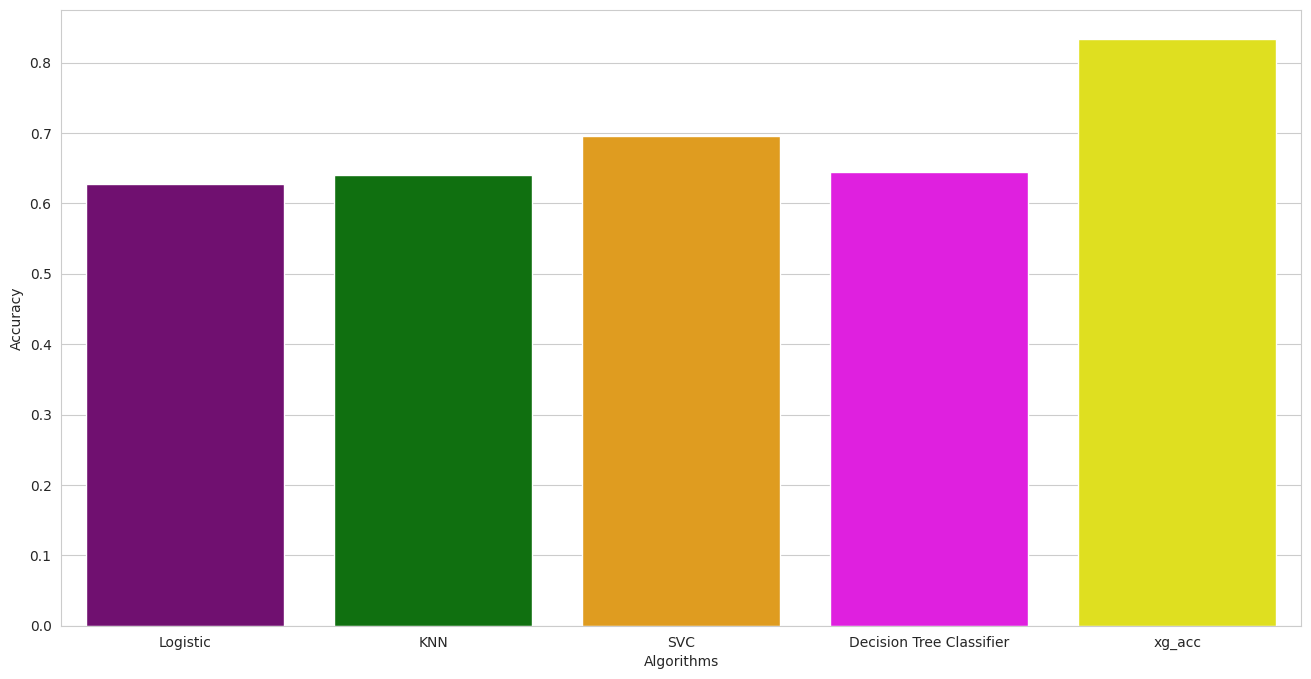

In [78]:
colors = ["purple", "green", "orange", "magenta","yellow"]

sns.set_style("whitegrid")
plt.figure(figsize=(16,8))
sns.barplot(x=models['Model'],y=models['Score'], palette=colors )
plt.ylabel("Accuracy")
plt.xlabel("Algorithms")
plt.show()